# Circle Packing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import circlify

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv("world_population_data.csv")
# dataset extret de https://www.kaggle.com/datasets/milanvaddoriya/world-population-data?resource=download

In [3]:
df.head()

,Unnamed: 0,Rank,country,country_code,1980,2000,2010,2021,2022,2030,2050,area,landAreaKm,growthRate,worldPercentage,density
0,0,1,China,CHN,982372466.0,1264099069,1348191368,1425893465,1425887337,1415605906,1312636325,9706961.0,9424702.9,0.0000,0.1788,151.2926
1,1,2,India,IND,696828385.0,1059633675,1240613620,1407563842,1417173173,1514994080,1670490596,3287590.0,2973190.0,0.0068,0.1777,476.6507
2,2,3,United States,USA,223140018.0,282398554,311182845,336997624,338289857,352162301,375391963,9372610.0,9147420.0,0.0038,0.0424,36.9820
3,3,4,Indonesia,IDN,148177096.0,214072421,244016173,273753191,275501339,292150100,317225213,1904569.0,1877519.0,0.0064,0.0345,146.7369
4,4,5,Pakistan,PAK,80624057.0,154369924,194454498,231402117,235824862,274029836,367808468,881912.0,770880.0,0.0191,0.0296,305.9164


In [4]:
keep_cols = ['country', '2022']
df_keep = df[keep_cols]
df_keep.rename(columns={'2022': 'population'}, inplace = True)
df_keep.head()

/var/folders/rt/cq3th0sd3fb94fqfrqm3bsfm0000gp/T/ipykernel_1914/3621467911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keep.rename(columns={'2022': 'population'}, inplace = True)


,country,population
0,China,1425887337
1,India,1417173173
2,United States,338289857
3,Indonesia,275501339
4,Pakistan,235824862


In [5]:
df_keep.tail()

,country,population
229,Montserrat,4390
230,Falkland Islands,3780
231,Niue,1934
232,Tokelau,1871
233,Vatican City,510


In [6]:
df_sorted = df_keep.sort_values(by = 'population', ascending = False)
df_top20 = df_sorted.head(20)
df_top20.tail()

,country,population
15,Vietnam,98186856
16,Iran,88550570
17,Turkey,85341241
18,Germany,83369843
19,Thailand,71697030


In [7]:
circles = circlify.circlify(
    df_top20['population'].tolist(),
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

circles = circles[::-1]

In [8]:
print(circles)

[Circle(x=0.4111509848333895, y=-0.3720946190695813, r=0.4257656354881132, level=1, ex={'datum': 1425887337}), Circle(x=-0.43907728082169983, y=-0.3720946190695813, r=0.42446263016697616, level=1, ex={'datum': 1417173173}), Circle(x=-0.014932472056007435, y=0.09623184860972328, r=0.2073826824941687, level=1, ex={'datum': 338289857}), Circle(x=-0.014901464760748832, y=-0.8127133881513502, r=0.18715001080613708, level=1, ex={'datum': 275501339}), Circle(x=0.3438542143132351, y=0.22302824681068148, r=0.17315011886802256, level=1, ex={'datum': 235824862}), Circle(x=-0.3696566672944789, y=0.21496198920561307, r=0.1666842914202637, level=1, ex={'datum': 218541212}), Circle(x=-0.13439449199170928, y=0.44940622751196685, r=0.1654488023888857, level=1, ex={'datum': 215313498}), Circle(x=0.1751315277921401, y=0.4957268475475416, r=0.14752397080985732, level=1, ex={'datum': 171186372}), Circle(x=0.6412654798652765, y=0.13998122008599112, r=0.1356382706887709, level=1, ex={'datum': 144713314}), Ci

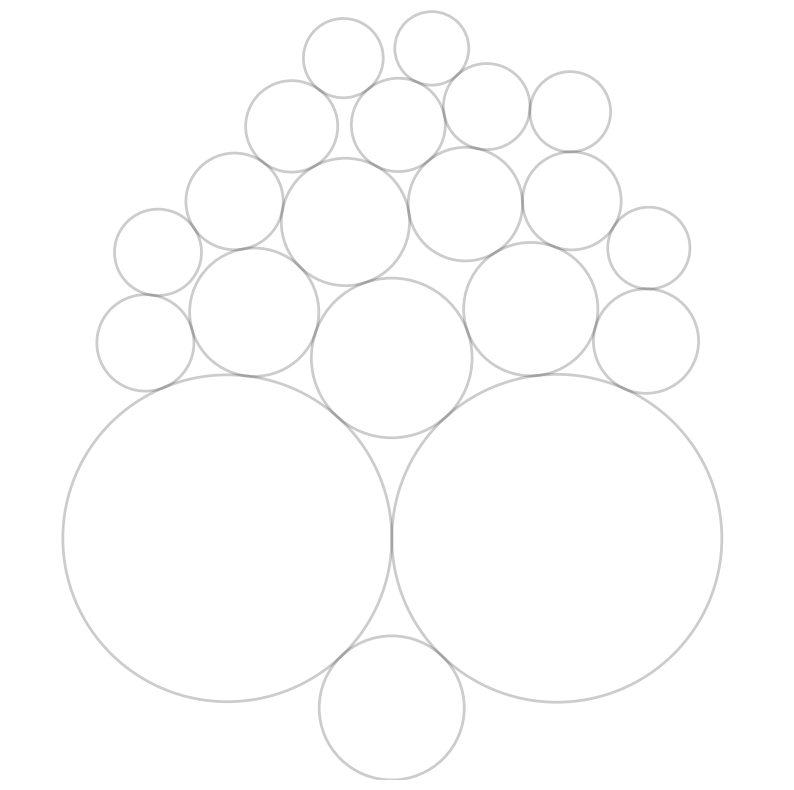

In [9]:
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10, 10))

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# print circles
for circle in circles:
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2, fill=False))

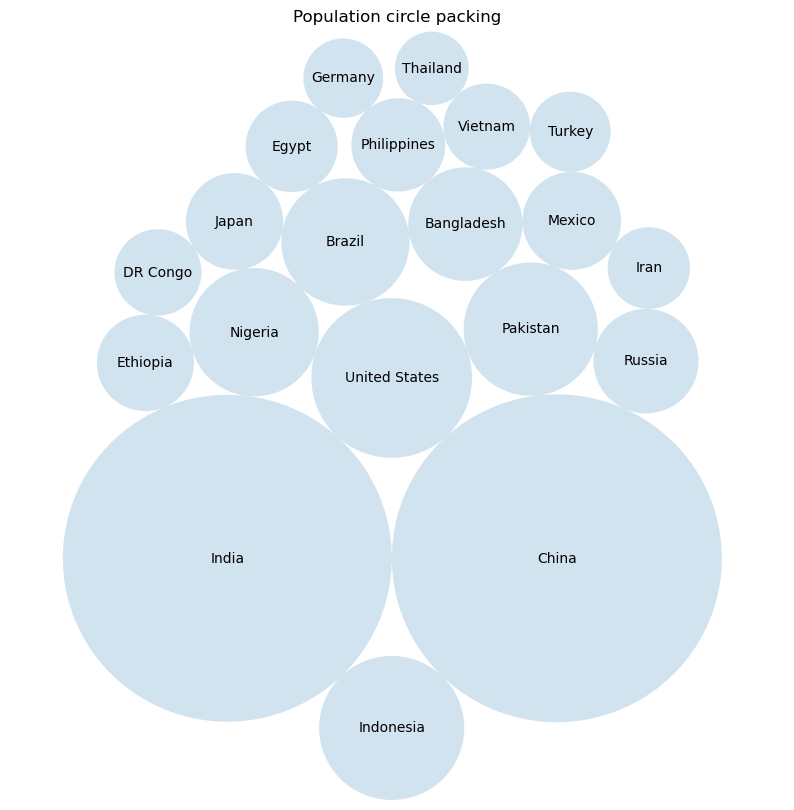

In [10]:
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10, 10))

# Title
ax.set_title('Population circle packing')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = df_top20['country']

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2))
    plt.annotate(
        label,
        (x, y),
        va='center',
        ha='center'
    )

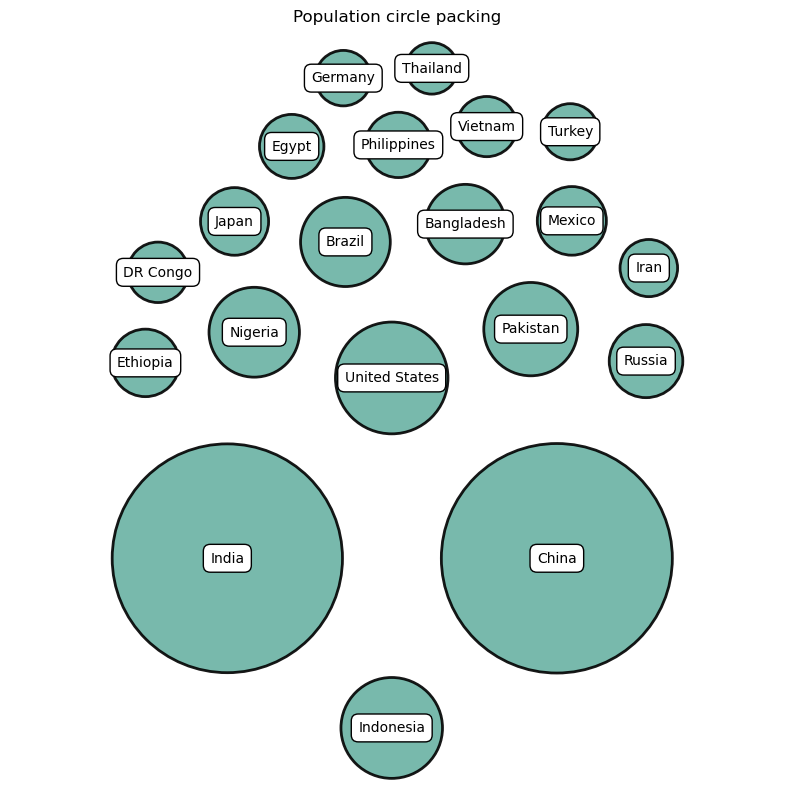

In [11]:
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10, 10))

# Title
ax.set_title('Population circle packing')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = df_top20['country']

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r*0.7, alpha=0.9, linewidth=2,
                 facecolor="#69b2a3", edgecolor="black"))
    plt.annotate(label, (x, y), va='center', ha='center', bbox=dict(
        facecolor='white', edgecolor='black', boxstyle='round', pad=.5))

# Linear Dendrogram

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
import numpy as np
 
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


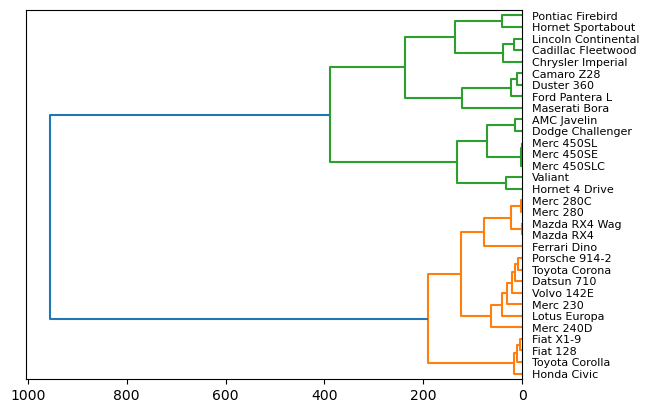

In [13]:
Z = hierarchy.linkage(df, 'ward')
 
hierarchy.dendrogram(Z, orientation="left", labels=df.index)
plt.show()

# Convex Hull

In [16]:
# dataset extret de: https://www.kaggle.com/datasets/wosaku/crime-in-vancouver
df_crime = pd.read_csv("crime.csv")
df_crime.tail()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
530647,Break and Enter Residential/Other,2017,3,3,9.0,16.0,31XX ADANAC ST,Hastings-Sunrise,497265.49,5458296.71,49.277420,-123.037595
530648,Mischief,2017,5,29,22.0,30.0,14XX E 7TH AVE,Grandview-Woodland,494533.97,5456824.97,49.264163,-123.075129
530649,Offence Against a Person,2017,4,13,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.00,0.00,0.000000,0.000000
530650,Theft from Vehicle,2017,6,5,17.0,0.0,8XX HAMILTON ST,Central Business District,491487.85,5458385.78,49.278168,-123.117031
530651,Vehicle Collision or Pedestrian Struck (with I...,2017,6,6,17.0,38.0,13XX BLOCK PARK DR,Marpole,490204.00,5451444.00,49.215706,-123.134512


In [24]:
coord = df_crime.query('NEIGHBOURHOOD == "Marpole"')[['Latitude', 'Longitude']].values

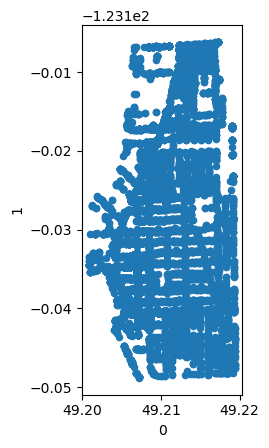

In [25]:
pd.DataFrame(coord).dropna().plot.scatter(x=0, y=1)
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

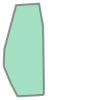

In [26]:
from shapely.geometry import Polygon

Polygon(
    list(
        pd.DataFrame(coord).apply(lambda srs: (srs[0], srs[1]), axis='columns').values
    )
).convex_hull